In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
veri =np.array ([[1,2,np.nan],
                [4,np.nan,6],
                 [7,8,9],
                  [np.nan,10,11]])
imputer=SimpleImputer(strategy='median')
veri_imputed=imputer.fit_transform(veri)
print(veri_imputed)

[[ 1.  2.  9.]
 [ 4.  8.  6.]
 [ 7.  8.  9.]
 [ 4. 10. 11.]]


In [ ]:
#veri d√∂n√º≈ü√ºm√º Polinomal √∂zellik
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
veri=np.array([[2,3],
               [4,5],
               [6,7]])
print("orijinal veri:\n",veri)

poly=PolynomialFeatures(degree=2)
veri_poly=poly.fit_transform(veri)
print("polinomal veri:\n",veri_poly)

orijinal veri:
 [[2 3]
 [4 5]
 [6 7]]
polinomal veri:
 [[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]
 [ 1.  6.  7. 36. 42. 49.]]


In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
veri=np.array([[1,10],
               [2,100],
               [3,1000]])
log_donusum=FunctionTransformer(np.log1p)
veri_log=log_donusum.fit_transform(veri)
print(veri_log)

[[0.69314718 2.39789527]
 [1.09861229 4.61512052]
 [1.38629436 6.90875478]]


In [ ]:
#Feature Selection
# varyans y√ºksek olduk√ßa veri seti ili≈ükisi s√ºtun i√ßin o kadar baƒülantƒ±lƒ± √∂zellik demektir.sabit deƒüerleri temizlemek i√ßin de kullanƒ±lƒ±r.
#korelasyon tabanlƒ±
#selectfrommodel

Veri setindeki deƒüi≈üen ile hedef deƒüi≈üken arasƒ±ndaki korelasyona bakarak baƒülantƒ±lƒ± mƒ± deƒüil mi ona bakabiliyoruz.Korelasyon -1 0+1
korelasyon 1 olmasƒ± demek √∂zellikleride artƒ±yor 1 artarken 2 artƒ±yor
korelasyonun -1 olmasƒ± demek √∂zellikler de artƒ±yor 1 azalƒ±rken 2 azalƒ±yor
korelasyon 0 olmasƒ± demek aralarƒ±nda herhangi br i≈üilki yok demektir
mutlak deƒüeri y√ºksek bir √∂zellƒüi se√ßmem gerekebilir.
**SELECT FROM MODEL**




√ñZELLƒ∞K **SE√áƒ∞Mƒ∞**

Varyans verier arasƒ±ndaki deƒüi≈üiklik. y√ºksek varyans iyi
Korelasyon 0 eleme sebebi
Select from modelde ise

iris dataseti sklearn i√ßinde mevcut

Varyans E≈üiƒüi ile Se√ßilen √ñzellikler: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
Korelasyon ile Se√ßilen √ñzellikler: ['petal length (cm)' 'petal width (cm)']
Random Forest Modelinde Se√ßilen √ñzellikler: ['petal length (cm)']


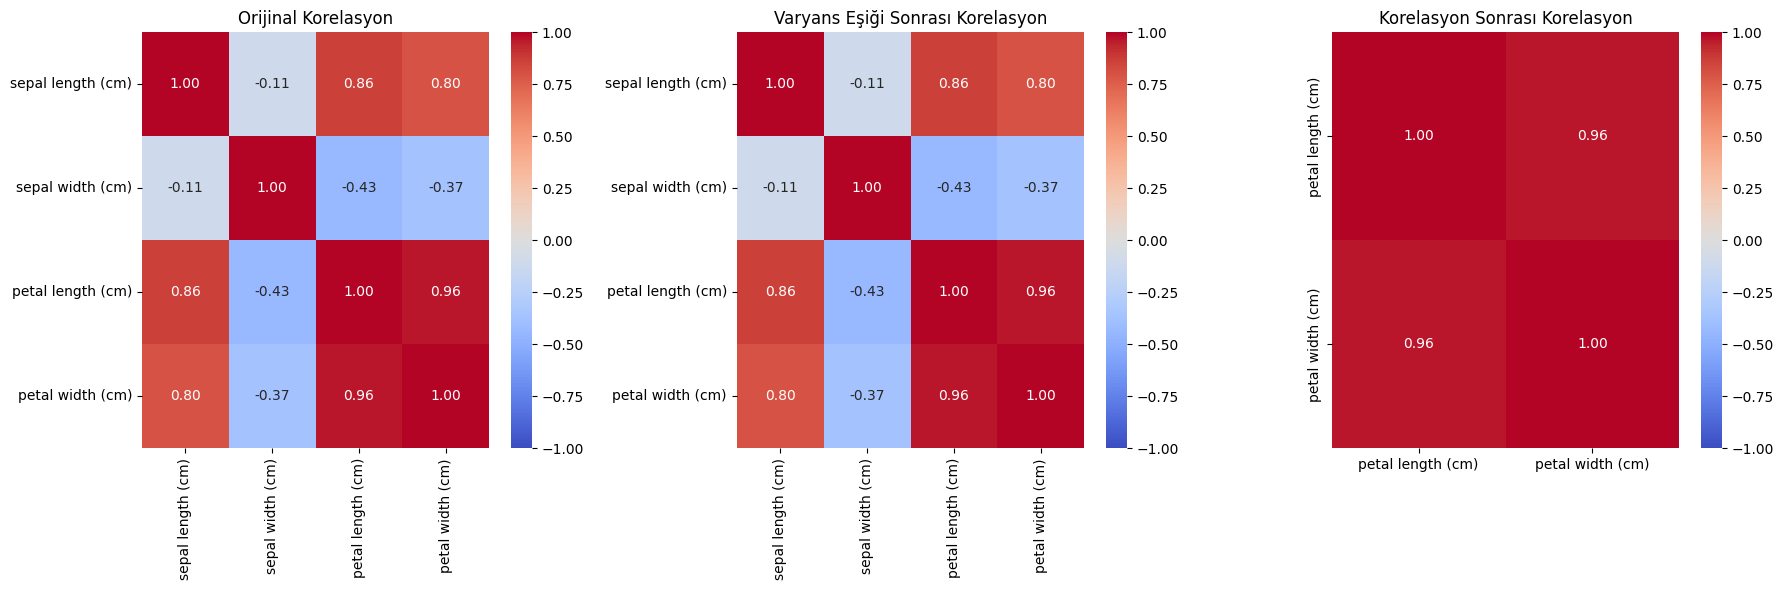

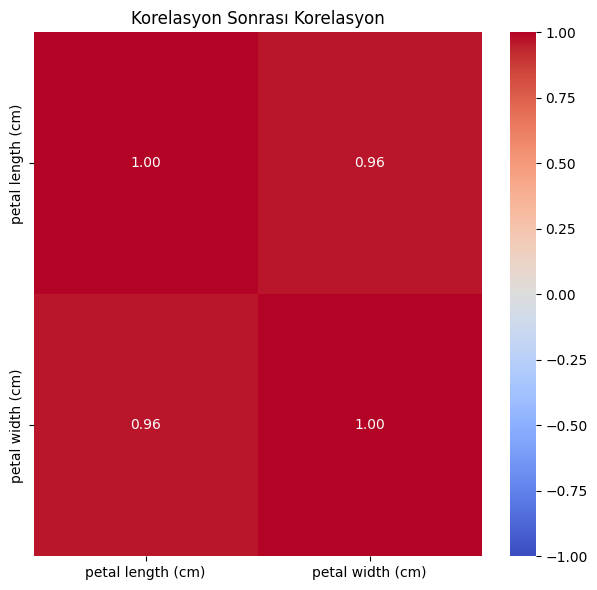

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, f_regression, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Adƒ±m: Iris veri setini y√ºkleme
iris = load_iris()
X, y = iris.data, iris.target
√∂zellik_isimleri = iris.feature_names

# 2. Adƒ±m: Veri setini eƒüitim ve test k√ºmelerine ayƒ±rma
X_eƒüitim, X_test, y_eƒüitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Adƒ±m: Varyans E≈üiƒüi Uygulama (G√∂rselle≈ütirme dahil)
varyans_esigi = VarianceThreshold(threshold=0.1)
X_eƒüitim_varyans = varyans_esigi.fit_transform(X_eƒüitim)
X_test_varyans = varyans_esigi.transform(X_test)

secilen_varyans = varyans_esigi.get_support(indices=True)
secilen_varyans_isimler = np.array(√∂zellik_isimleri)[secilen_varyans]

print("Varyans E≈üiƒüi ile Se√ßilen √ñzellikler:", secilen_varyans_isimler)

# 4. Adƒ±m: Korelasyon Tabanlƒ± Se√ßim (SelectKBest)
# f_regression y√∂ntemiyle hedef ile √∂zellik arasƒ±ndaki lineer ili≈ükiye bakƒ±lƒ±r
k_best = SelectKBest(score_func=f_regression, k=2)  # En iyi 2 √∂zelliƒüi se√ßiyoruz
X_eƒüitim_kbest = k_best.fit_transform(X_eƒüitim_varyans, y_eƒüitim)
X_test_kbest = k_best.transform(X_test_varyans)

secilen_kbest = k_best.get_support(indices=True)
secilen_kbest_isimler = secilen_varyans_isimler[secilen_kbest]

print("Korelasyon ile Se√ßilen √ñzellikler:", secilen_kbest_isimler)

# 5. Adƒ±m: SelectFromModel Uygulama (G√∂rselle≈ütirme dahil)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
secici = SelectFromModel(random_forest, threshold="median")
random_forest.fit(X_eƒüitim_kbest, y_eƒüitim)
X_eƒüitim_secici = secici.fit_transform(X_eƒüitim_kbest, y_eƒüitim)
X_test_secici = secici.transform(X_test_kbest)

secilen_rf = secici.get_support(indices=True)
secilen_rf_isimler = secilen_kbest_isimler[secilen_rf]

print("Random Forest Modelinde Se√ßilen √ñzellikler:", secilen_rf_isimler)

# G√∂rselle≈ütirmeler (Korelasyon dahil)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(np.corrcoef(X_eƒüitim.T), annot=True, fmt=".2f",
            xticklabels=√∂zellik_isimleri, yticklabels=√∂zellik_isimleri,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Orijinal Korelasyon")

plt.subplot(1, 3, 2)
sns.heatmap(np.corrcoef(X_eƒüitim_varyans.T), annot=True, fmt=".2f",
            xticklabels=secilen_varyans_isimler, yticklabels=secilen_varyans_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Varyans E≈üiƒüi Sonrasƒ± Korelasyon")

plt.subplot(1, 3, 3)
sns.heatmap(np.corrcoef(X_eƒüitim_kbest.T), annot=True, fmt=".2f",
            xticklabels=secilen_kbest_isimler, yticklabels=secilen_kbest_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasyon Sonrasƒ± Korelasyon")

plt.tight_layout()
plt.show()

# ƒ∞kinci g√∂rselle≈ütirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(np.corrcoef(X_eƒüitim_kbest.T), annot=True, fmt=".2f",
            xticklabels=secilen_kbest_isimler, yticklabels=secilen_kbest_isimler,
            cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasyon Sonrasƒ± Korelasyon")

if X_eƒüitim_secici.shape[1] > 1:
    plt.subplot(1, 2, 2)
    sns.heatmap(np.corrcoef(X_eƒüitim_secici.T), annot=True, fmt=".2f",
                xticklabels=secilen_rf_isimler, yticklabels=secilen_rf_isimler,
                cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Random Forest Sonrasƒ± Korelasyon")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 1. √ñrnek Veri K√ºmesi Olu≈üturma
# 10 √∂rnek (satƒ±r) ve 5 √∂zellik (s√ºtun)
X = np.array([[0, 2, 1, 3, 4],
              [0, 1, 4, 3, 2],
              [0, 0, 1, 2, 2],
              [0, 1, 3, 2, 1],
              [0, 2, 1, 3, 4],
              [1, 2, 1, 3, 4],
              [1, 1, 4, 3, 2],
              [1, 0, 1, 2, 2],
              [1, 1, 3, 2, 1],
              [1, 2, 1, 3, 4]])
y = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])  # Hedef deƒüi≈üken (sƒ±nƒ±flandƒ±rma)

# 2. Varyans E≈üiƒüi
varyans_esigi = VarianceThreshold(threshold=0.8)  # Varyansƒ± 0.8'den d√º≈ü√ºk olan s√ºtunlarƒ± kaldƒ±r
X_varyans = varyans_esigi.fit_transform(X)

print("Orijinal X:\n", X)
print("\nVaryans E≈üiƒüi Sonrasƒ± X:\n", X_varyans)
print("Varyans E≈üiƒüi ile se√ßilen s√ºtunlar:", varyans_esigi.get_support(indices=True)) # Se√ßilen s√ºtunlarƒ±n indeksleri

# 3. Korelasyon (SelectKBest)
# f_classif: Sƒ±nƒ±flandƒ±rma g√∂revleri i√ßin ANOVA F-deƒüerini kullanƒ±r
# k=2: En iyi 2 √∂zelliƒüi se√ßer
k_best = SelectKBest(score_func=f_classif, k=2)
X_kbest = k_best.fit_transform(X_varyans, y)

print("\nSelectKBest Sonrasƒ± X:\n", X_kbest)
print("SelectKBest ile se√ßilen s√ºtunlar:", k_best.get_support(indices=True))

# 4. Model Tabanlƒ± Se√ßim (SelectFromModel)
rf = RandomForestClassifier(n_estimators=10)  # K√º√ß√ºk bir orman
sfm = SelectFromModel(rf, threshold="mean") # Ortalamadan daha √∂nemli olanlarƒ± se√ßer
X_sfm = sfm.fit_transform(X_kbest, y)

print("\nSelectFromModel Sonrasƒ± X:\n", X_sfm)
print("SelectFromModel ile se√ßilen s√ºtunlar:", sfm.get_support(indices=True))

Orijinal X:
 [[0 2 1 3 4]
 [0 1 4 3 2]
 [0 0 1 2 2]
 [0 1 3 2 1]
 [0 2 1 3 4]
 [1 2 1 3 4]
 [1 1 4 3 2]
 [1 0 1 2 2]
 [1 1 3 2 1]
 [1 2 1 3 4]]

Varyans E≈üiƒüi Sonrasƒ± X:
 [[1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]
 [1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]]
Varyans E≈üiƒüi ile se√ßilen s√ºtunlar: [2 4]

SelectKBest Sonrasƒ± X:
 [[1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]
 [1 4]
 [4 2]
 [1 2]
 [3 1]
 [1 4]]
SelectKBest ile se√ßilen s√ºtunlar: [0 1]

SelectFromModel Sonrasƒ± X:
 [[1]
 [4]
 [1]
 [3]
 [1]
 [1]
 [4]
 [1]
 [3]
 [1]]
SelectFromModel ile se√ßilen s√ºtunlar: [0]



PCA korelasyonlar √ßok y√ºksekse bunlarƒ± arttƒ±rmanƒ±n bir anlamƒ± yok.
Y√ºksek boyuttaki veri setlerindeki √∂zellik sayƒ±sƒ±nƒ± azaltma i≈ülemidir.
Ama√ß:
+veri k√ºmesinin karma≈üƒ±klƒ±ƒüƒ±nƒ± arttƒ±rmak
hesaplama maliyetini d√º≈ü√ºrmek
g√∂rselle≈ütirmeyi kolayla≈ütƒ±rmak
a≈üƒ±rƒ± √∂ƒürenmeyi √∂nlemek
√∂zellikler arasƒ±ndaki √ßoklu doƒürusallƒ±k sorununu √ß√∂zmek

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#veri 2 boyutlu
veri=np.array ([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,12],
                [13,14,15,16]])
#veriyi √∂l√ßeklendir
scaler=StandardScaler()
veri_sc=scaler.fit_transform(veri)
print(veri_sc)
#PCA uygula (2 √∂zelliƒüe indirge)
pca=PCA(n_components=2)
veri_pca=pca.fit_transform(veri_sc)
print(veri_pca)

[[-1.34164079 -1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079  1.34164079]]
[[-2.68328157e+00 -3.00991270e-16]
 [-8.94427191e-01  5.58663097e-17]
 [ 8.94427191e-01 -5.58663097e-17]
 [ 2.68328157e+00 -2.63747063e-16]]


PCA Veri g√∂rselle≈ütirme alanƒ±nda kullanƒ±lƒ±r.

EKSƒ∞K YANLI≈û VE MARJƒ∞NAL VERƒ∞LERLE √áALI≈ûMA Y√ñNTEMƒ∞
Veri temizliƒüi √ßok √∂nemlidir.



In [ ]:
#Eksik Veri Temizliƒüi
import pandas as pd
import numpy as np

data={'A':[1,2,np.nan,4],
       'B':[5,np.nan,7,8],
       'C':['a','b','c',np.nan]}
df=pd.DataFrame(data)
print(df)
print(df.isnull())
print(df.isnull().sum())
print(df.isnull().sum().sum())


     A    B    C
0  1.0  5.0    a
1  2.0  NaN    b
2  NaN  7.0    c
3  4.0  8.0  NaN
       A      B      C
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True
A    1
B    1
C    1
dtype: int64
3


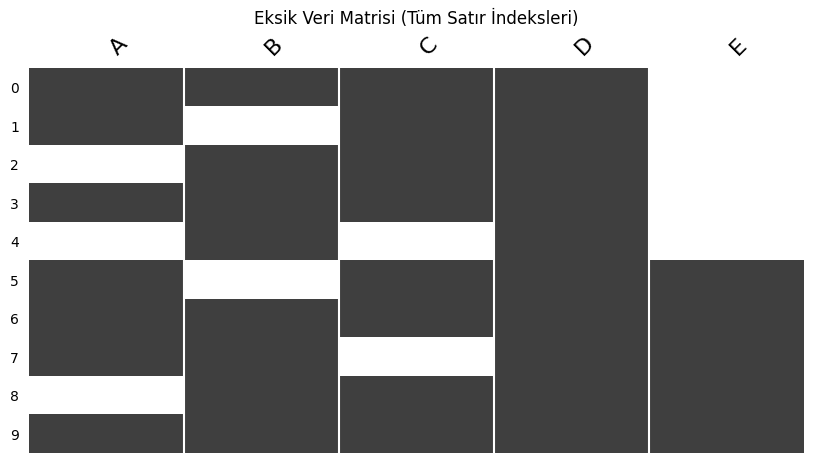

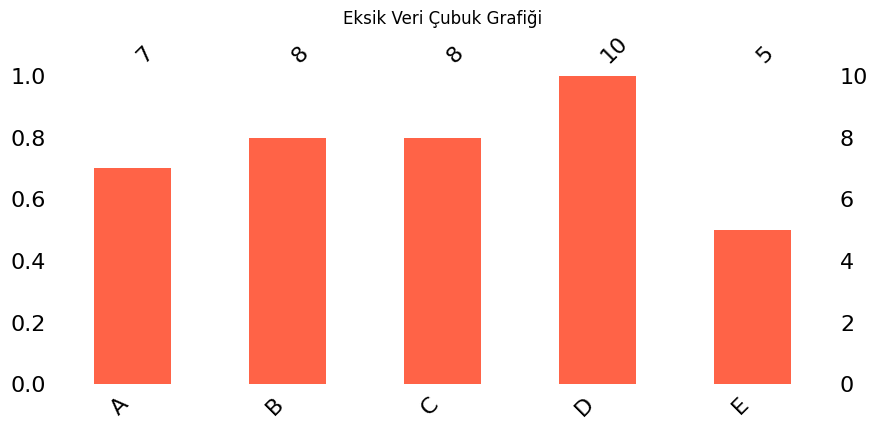

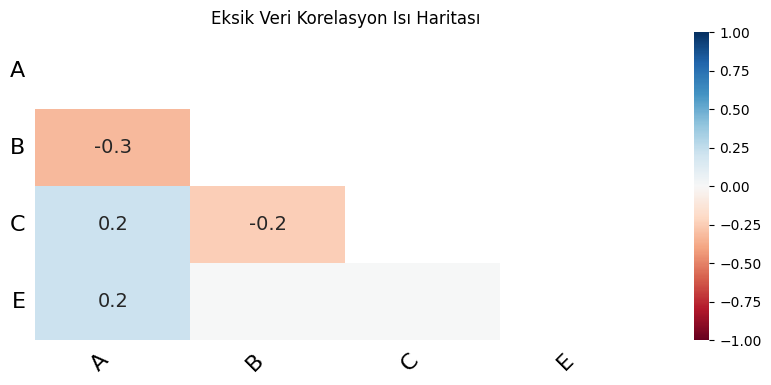

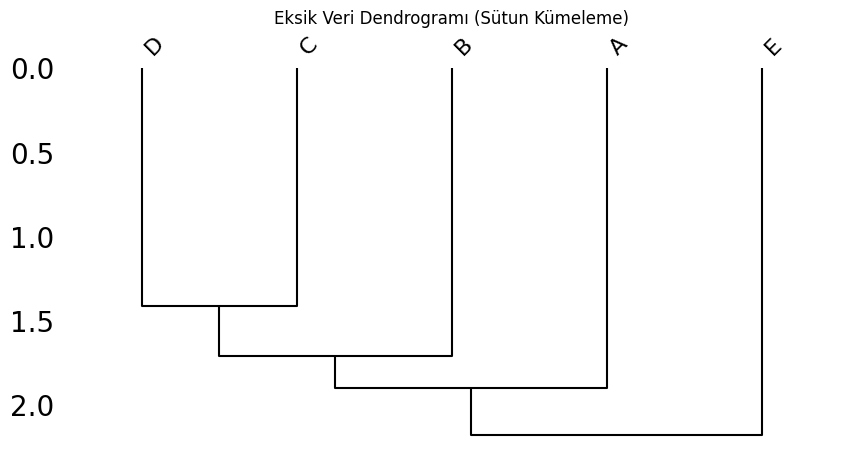

In [ ]:
# üì¶ Gerekli k√ºt√ºphaneleri i√ße aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# üìä √ñrnek veri: Bazƒ± h√ºcreler eksik (NaN)
data = {
    'A': [1, 2, np.nan, 4, np.nan, 6, 7, 8, np.nan, 10],
    'B': [11, np.nan, 13, 14, 15, np.nan, 17, 18, 19, 20],
    'C': [21, 22, 23, 24, np.nan, 26, 27, np.nan, 29, 30],
    'D': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    'E': [np.nan]*5 + [46, 47, 48, 49, 50]
}
df = pd.DataFrame(data)

# ----------------------------------------------------
# 1Ô∏è‚É£ Eksik Veri Matrisi (sparkline kapalƒ±, t√ºm satƒ±r indeksleri a√ßƒ±k)
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
msno.matrix(df, ax=ax, sparkline=False)  # sparkline kapalƒ±
ax.set_yticks(np.arange(len(df)))         # Satƒ±r sayƒ±sƒ± kadar yer i≈üareti
ax.set_yticklabels(df.index, fontsize=10) # ƒ∞ndeksleri g√∂ster
plt.title("Eksik Veri Matrisi (T√ºm Satƒ±r ƒ∞ndeksleri)")
plt.show()

# ----------------------------------------------------
# 2Ô∏è‚É£ Eksik Veri √áubuk Grafiƒüi: Hangi s√ºtunda ne kadar eksik?
msno.bar(df, figsize=(10, 4), color='tomato')
plt.title("Eksik Veri √áubuk Grafiƒüi")
plt.show()

# ----------------------------------------------------
# 3Ô∏è‚É£ Eksik Veri Isƒ± Haritasƒ±: Korelasyon ili≈ükileri (birlikte eksik olma)
msno.heatmap(df, figsize=(10, 4))
plt.title("Eksik Veri Korelasyon Isƒ± Haritasƒ±")
plt.show()

# ----------------------------------------------------
# 4Ô∏è‚É£ Eksik Veri Dendrogramƒ±: Eksiklik √∂r√ºnt√ºs√ºne g√∂re s√ºtun gruplama
msno.dendrogram(df, figsize=(10, 5))
plt.title("Eksik Veri Dendrogramƒ± (S√ºtun K√ºmeleme)")
plt.show()